In [152]:
import requests
import numpy as np

from scipy.stats import linregress
from sklearn import linear_model, datasets

from datetime import date

import matplotlib.pyplot as plt
from alive_progress import alive_bar


In [116]:
# Request of current comic
r = requests.get('https://xkcd.com/info.0.json').json()

# Initializations
num_comics = r['num']
comic_dates=[]

comic_url_str='https://xkcd.com/{}/info.0.json'

days=[]
comic_numbers=[]
prev_day=-1

r = requests.get('https://xkcd.com/1/info.0.json').json()
day_0=date(int(r["year"]), int(r["month"]), int(r["day"]))

num_max=num_comics
with alive_bar(num_max) as bar:
    for i in range(num_max):
        # i-th comic
        comic_url=comic_url_str.format(i+1)
        
        try:
            r = requests.get(comic_url).json()
            
            # Two additions to allow regression 
            if(len(days)<=2):
                if(int(r['day'])!=1):
                    prev_day=int(r['day'])

                    days.append(int(r['day']))
                    comic_numbers.append(int(r['num']))
            
            # Further additions for regression
            else:
                curr_day = date(int(r["year"]), int(r["month"]), int(r["day"]))
                delta_t = (curr_day - day_0).days
                
                # Adds day interval               
                days.append(delta_t)
                comic_numbers.append(int(r['num']))
                
                ransac = linear_model.RANSACRegressor()

                X = np.concatenate([
                        np.array(days).reshape(-1, 1), 
                        np.ones(len(days)).reshape(-1, 1)
                    ], axis=1)

                y=np.array(comic_numbers)

                ransac.fit(X, y)
                
                print("Estimated coefficients (RANSAC):")
                print(ransac.estimator_.coef_)

                prev_day=int(r['day'])

            comic_dates.append((r['num'], r['day'], r['month'], r['year']))

        except:
            print("Oops!", sys.exc_info()[0], "occurred at comic ", i, ".")
            print("Next entry.")

        bar()


on 47: Estimated coefficients (RANSAC):
on 47: [0.4137931 0.       ]
on 48: Estimated coefficients (RANSAC):
on 48: [0.43233083 0.        ]
on 49: Estimated coefficients (RANSAC):
on 49: [0.41989882 0.        ]
on 50: Estimated coefficients (RANSAC):
on 50: [0.441 0.   ]
on 51: Estimated coefficients (RANSAC):
on 51: [0.43981481 0.        ]
on 52: Estimated coefficients (RANSAC):
on 52: [0.44278426 0.        ]
on 53: Estimated coefficients (RANSAC):
on 53: [0.44703596 0.        ]
on 54: Estimated coefficients (RANSAC):
on 54: [0.45152027 0.        ]
on 55: Estimated coefficients (RANSAC):
on 55: [0.44801313 0.        ]
on 56: Estimated coefficients (RANSAC):
on 56: [0.45391061 0.        ]
on 57: Estimated coefficients (RANSAC):
on 57: [0.46413043 0.        ]
on 58: Estimated coefficients (RANSAC):
on 58: [0.47215109 0.        ]
on 59: Estimated coefficients (RANSAC):
on 59: [0.473826 0.      ]
on 60: Estimated coefficients (RANSAC):
on 60: [0.47546614 0.        ]
on 61: Estimated coeff

on 161: [0.43787798 0.        ]
on 162: Estimated coefficients (RANSAC):
on 162: [0.43815387 0.        ]
on 163: Estimated coefficients (RANSAC):
on 163: [0.43843826 0.        ]
on 164: Estimated coefficients (RANSAC):
on 164: [0.43865586 0.        ]
on 165: Estimated coefficients (RANSAC):
on 165: [0.43888408 0.        ]
on 166: Estimated coefficients (RANSAC):
on 166: [0.4391221 0.       ]
on 167: Estimated coefficients (RANSAC):
on 167: [0.43929739 0.        ]
on 168: Estimated coefficients (RANSAC):
on 168: [0.43948436 0.        ]
on 169: Estimated coefficients (RANSAC):
on 169: [0.43968216 0.        ]
on 170: Estimated coefficients (RANSAC):
on 170: [0.43982095 0.        ]
on 171: Estimated coefficients (RANSAC):
on 171: [0.43997226 0.        ]
on 172: Estimated coefficients (RANSAC):
on 172: [0.44013521 0.        ]
on 173: Estimated coefficients (RANSAC):
on 173: [0.44024258 0.        ]
on 174: Estimated coefficients (RANSAC):
on 174: [0.44036308 0.        ]
on 175: Estimated coe

on 274: [0.43858565 0.        ]
on 275: Estimated coefficients (RANSAC):
on 275: [0.43861941 0.        ]
on 276: Estimated coefficients (RANSAC):
on 276: [0.43865817 0.        ]
on 277: Estimated coefficients (RANSAC):
on 277: [0.438681 0.      ]
on 278: Estimated coefficients (RANSAC):
on 278: [0.43870903 0.        ]
on 279: Estimated coefficients (RANSAC):
on 279: [0.43874206 0.        ]
on 280: Estimated coefficients (RANSAC):
on 280: [0.43875965 0.        ]
on 281: Estimated coefficients (RANSAC):
on 281: [0.43878243 0.        ]
on 282: Estimated coefficients (RANSAC):
on 282: [0.43881022 0.        ]
on 283: Estimated coefficients (RANSAC):
on 283: [0.43882303 0.        ]
on 284: Estimated coefficients (RANSAC):
on 284: [0.43884101 0.        ]
on 285: Estimated coefficients (RANSAC):
on 285: [0.43886399 0.        ]
on 286: Estimated coefficients (RANSAC):
on 286: [0.43887243 0.        ]
on 287: Estimated coefficients (RANSAC):
on 287: [0.43888604 0.        ]
on 288: Estimated coeff

on 387: [0.43899091 0.        ]
on 388: Estimated coefficients (RANSAC):
on 388: [0.43898811 0.        ]
on 389: Estimated coefficients (RANSAC):
on 389: [0.43898803 0.        ]
on 390: Estimated coefficients (RANSAC):
on 390: [0.43898104 0.        ]
on 391: Estimated coefficients (RANSAC):
on 391: [0.43897681 0.        ]
on 392: Estimated coefficients (RANSAC):
on 392: [0.4389753 0.       ]
on 393: Estimated coefficients (RANSAC):
on 393: [0.438967 0.      ]
on 394: Estimated coefficients (RANSAC):
on 394: [0.43896145 0.        ]
on 395: Estimated coefficients (RANSAC):
on 395: [0.43895859 0.        ]
on 396: Estimated coefficients (RANSAC):
on 396: [0.43894908 0.        ]
on 397: Estimated coefficients (RANSAC):
on 397: [0.43894229 0.        ]
on 398: Estimated coefficients (RANSAC):
on 398: [0.43893818 0.        ]
on 399: Estimated coefficients (RANSAC):
on 399: [0.43892754 0.        ]
on 400: Estimated coefficients (RANSAC):
on 400: [0.43891961 0.        ]
on 401: Estimated coeffic

on 500: Estimated coefficients (RANSAC):
on 500: [0.43836157 0.        ]
on 501: Estimated coefficients (RANSAC):
on 501: [0.43836791 0.        ]
on 502: Estimated coefficients (RANSAC):
on 502: [0.43837569 0.        ]
on 503: Estimated coefficients (RANSAC):
on 503: [0.4383849 0.       ]
on 504: Estimated coefficients (RANSAC):
on 504: [0.43839011 0.        ]
on 505: Estimated coefficients (RANSAC):
on 505: [0.43839676 0.        ]
on 506: Estimated coefficients (RANSAC):
on 506: [0.43840483 0.        ]
on 507: Estimated coefficients (RANSAC):
on 507: [0.43840896 0.        ]
on 508: Estimated coefficients (RANSAC):
on 508: [0.43841453 0.        ]
on 509: Estimated coefficients (RANSAC):
on 509: [0.43842152 0.        ]
on 510: Estimated coefficients (RANSAC):
on 510: [0.43842462 0.        ]
on 511: Estimated coefficients (RANSAC):
on 511: [0.43842917 0.        ]
on 512: Estimated coefficients (RANSAC):
on 512: [0.43843512 0.        ]
on 513: Estimated coefficients (RANSAC):
on 513: [0.4

on 612: [0.43837181 0.        ]
on 613: Estimated coefficients (RANSAC):
on 613: [0.43837404 0.        ]
on 614: Estimated coefficients (RANSAC):
on 614: [0.43837371 0.        ]
on 615: Estimated coefficients (RANSAC):
on 615: [0.43837437 0.        ]
on 616: Estimated coefficients (RANSAC):
on 616: [0.43837601 0.        ]
on 617: Estimated coefficients (RANSAC):
on 617: [0.43837512 0.        ]
on 618: Estimated coefficients (RANSAC):
on 618: [0.43837522 0.        ]
on 619: Estimated coefficients (RANSAC):
on 619: [0.4383763 0.       ]
on 620: Estimated coefficients (RANSAC):
on 620: [0.43837487 0.        ]
on 621: Estimated coefficients (RANSAC):
on 621: [0.43837443 0.        ]
on 622: Estimated coefficients (RANSAC):
on 622: [0.43837497 0.        ]
on 623: Estimated coefficients (RANSAC):
on 623: [0.43837303 0.        ]
on 624: Estimated coefficients (RANSAC):
on 624: [0.43837207 0.        ]
on 625: Estimated coefficients (RANSAC):
on 625: [0.43837208 0.        ]
on 626: Estimated coe

on 725: [0.43771324 0.        ]
on 726: Estimated coefficients (RANSAC):
on 726: [0.43770336 0.        ]
on 727: Estimated coefficients (RANSAC):
on 727: [0.43769428 0.        ]
on 728: Estimated coefficients (RANSAC):
on 728: [0.43768351 0.        ]
on 729: Estimated coefficients (RANSAC):
on 729: [0.43767354 0.        ]
on 730: Estimated coefficients (RANSAC):
on 730: [0.43766436 0.        ]
on 731: Estimated coefficients (RANSAC):
on 731: [0.4376535 0.       ]
on 732: Estimated coefficients (RANSAC):
on 732: [0.43764344 0.        ]
on 733: Estimated coefficients (RANSAC):
on 733: [0.43763416 0.        ]
on 734: Estimated coefficients (RANSAC):
on 734: [0.43762322 0.        ]
on 735: Estimated coefficients (RANSAC):
on 735: [0.43761307 0.        ]
on 736: Estimated coefficients (RANSAC):
on 736: [0.4376037 0.       ]
on 737: Estimated coefficients (RANSAC):
on 737: [0.43759269 0.        ]
on 738: Estimated coefficients (RANSAC):
on 738: [0.43758246 0.        ]
on 739: Estimated coeff

on 838: [0.43662818 0.        ]
on 839: Estimated coefficients (RANSAC):
on 839: [0.4366251 0.       ]
on 840: Estimated coefficients (RANSAC):
on 840: [0.43662256 0.        ]
on 841: Estimated coefficients (RANSAC):
on 841: [0.43661877 0.        ]
on 842: Estimated coefficients (RANSAC):
on 842: [0.43661552 0.        ]
on 843: Estimated coefficients (RANSAC):
on 843: [0.43661282 0.        ]
on 844: Estimated coefficients (RANSAC):
on 844: [0.43660887 0.        ]
on 845: Estimated coefficients (RANSAC):
on 845: [0.43660547 0.        ]
on 846: Estimated coefficients (RANSAC):
on 846: [0.43660261 0.        ]
on 847: Estimated coefficients (RANSAC):
on 847: [0.43659851 0.        ]
on 848: Estimated coefficients (RANSAC):
on 848: [0.43659496 0.        ]
on 849: Estimated coefficients (RANSAC):
on 849: [0.43659195 0.        ]
on 850: Estimated coefficients (RANSAC):
on 850: [0.43658771 0.        ]
on 851: Estimated coefficients (RANSAC):
on 851: [0.43658401 0.        ]
on 852: Estimated coe

on 951: Estimated coefficients (RANSAC):
on 951: [0.43604653 0.        ]
on 952: Estimated coefficients (RANSAC):
on 952: [0.43603959 0.        ]
on 953: Estimated coefficients (RANSAC):
on 953: [0.43603311 0.        ]
on 954: Estimated coefficients (RANSAC):
on 954: [0.43602708 0.        ]
on 955: Estimated coefficients (RANSAC):
on 955: [0.43602011 0.        ]
on 956: Estimated coefficients (RANSAC):
on 956: [0.43601359 0.        ]
on 957: Estimated coefficients (RANSAC):
on 957: [0.43600752 0.        ]
on 958: Estimated coefficients (RANSAC):
on 958: [0.43600052 0.        ]
on 959: Estimated coefficients (RANSAC):
on 959: [0.43599397 0.        ]
on 960: Estimated coefficients (RANSAC):
on 960: [0.43598923 0.        ]
on 961: Estimated coefficients (RANSAC):
on 961: [0.43598219 0.        ]
on 962: Estimated coefficients (RANSAC):
on 962: [0.4359756 0.       ]
on 963: Estimated coefficients (RANSAC):
on 963: [0.43596945 0.        ]
on 964: Estimated coefficients (RANSAC):
on 964: [0.4

on 1062: Estimated coefficients (RANSAC):
on 1062: [0.43529106 0.        ]
on 1063: Estimated coefficients (RANSAC):
on 1063: [0.43528374 0.        ]
on 1064: Estimated coefficients (RANSAC):
on 1064: [0.43527679 0.        ]
on 1065: Estimated coefficients (RANSAC):
on 1065: [0.4352702 0.       ]
on 1066: Estimated coefficients (RANSAC):
on 1066: [0.43526289 0.        ]
on 1067: Estimated coefficients (RANSAC):
on 1067: [0.43525594 0.        ]
on 1068: Estimated coefficients (RANSAC):
on 1068: [0.43524936 0.        ]
on 1069: Estimated coefficients (RANSAC):
on 1069: [0.43524206 0.        ]
on 1070: Estimated coefficients (RANSAC):
on 1070: [0.43523512 0.        ]
on 1071: Estimated coefficients (RANSAC):
on 1071: [0.43522854 0.        ]
on 1072: Estimated coefficients (RANSAC):
on 1072: [0.43522125 0.        ]
on 1073: Estimated coefficients (RANSAC):
on 1073: [0.43521431 0.        ]
on 1074: Estimated coefficients (RANSAC):
on 1074: [0.43520774 0.        ]
on 1075: Estimated coeffici

on 1171: [0.4345538 0.       ]
on 1172: Estimated coefficients (RANSAC):
on 1172: [0.43454731 0.        ]
on 1173: Estimated coefficients (RANSAC):
on 1173: [0.43454113 0.        ]
on 1174: Estimated coefficients (RANSAC):
on 1174: [0.43453436 0.        ]
on 1175: Estimated coefficients (RANSAC):
on 1175: [0.43452789 0.        ]
on 1176: Estimated coefficients (RANSAC):
on 1176: [0.43452173 0.        ]
on 1177: Estimated coefficients (RANSAC):
on 1177: [0.43451497 0.        ]
on 1178: Estimated coefficients (RANSAC):
on 1178: [0.43450853 0.        ]
on 1179: Estimated coefficients (RANSAC):
on 1179: [0.43450238 0.        ]
on 1180: Estimated coefficients (RANSAC):
on 1180: [0.43449565 0.        ]
on 1181: Estimated coefficients (RANSAC):
on 1181: [0.43448922 0.        ]
on 1182: Estimated coefficients (RANSAC):
on 1182: [0.43448309 0.        ]
on 1183: Estimated coefficients (RANSAC):
on 1183: [0.43447637 0.        ]
on 1184: Estimated coefficients (RANSAC):
on 1184: [0.43446996 0.    

on 1281: [0.43387979 0.        ]
on 1282: Estimated coefficients (RANSAC):
on 1282: [0.43387379 0.        ]
on 1283: Estimated coefficients (RANSAC):
on 1283: [0.43386805 0.        ]
on 1284: Estimated coefficients (RANSAC):
on 1284: [0.43386256 0.        ]
on 1285: Estimated coefficients (RANSAC):
on 1285: [0.43385658 0.        ]
on 1286: Estimated coefficients (RANSAC):
on 1286: [0.43385086 0.        ]
on 1287: Estimated coefficients (RANSAC):
on 1287: [0.43384539 0.        ]
on 1288: Estimated coefficients (RANSAC):
on 1288: [0.43383943 0.        ]
on 1289: Estimated coefficients (RANSAC):
on 1289: [0.43383373 0.        ]
on 1290: Estimated coefficients (RANSAC):
on 1290: [0.43382828 0.        ]
on 1291: Estimated coefficients (RANSAC):
on 1291: [0.43382235 0.        ]
on 1292: Estimated coefficients (RANSAC):
on 1292: [0.43381667 0.        ]
on 1293: Estimated coefficients (RANSAC):
on 1293: [0.43381124 0.        ]
on 1294: Estimated coefficients (RANSAC):
on 1294: [0.43380532 0.  

on 1391: Estimated coefficients (RANSAC):
on 1391: [0.43328899 0.        ]
on 1392: Estimated coefficients (RANSAC):
on 1392: [0.4332842 0.       ]
on 1393: Estimated coefficients (RANSAC):
on 1393: [0.43327899 0.        ]
on 1394: Estimated coefficients (RANSAC):
on 1394: [0.43327401 0.        ]
on 1395: Estimated coefficients (RANSAC):
on 1395: [0.43326924 0.        ]
on 1396: Estimated coefficients (RANSAC):
on 1396: [0.43326406 0.        ]
on 1397: Estimated coefficients (RANSAC):
on 1397: [0.43325909 0.        ]
on 1398: Estimated coefficients (RANSAC):
on 1398: [0.43325434 0.        ]
on 1399: Estimated coefficients (RANSAC):
on 1399: [0.43324918 0.        ]
on 1400: Estimated coefficients (RANSAC):
on 1400: [0.43324423 0.        ]
on 1401: Estimated coefficients (RANSAC):
on 1401: [0.4332395 0.       ]
on 1402: Estimated coefficients (RANSAC):
on 1402: [0.43323436 0.        ]
on 1403: Estimated coefficients (RANSAC):
on 1403: [0.43322943 0.        ]
on 1404: Estimated coefficien

on 1501: Estimated coefficients (RANSAC):
on 1501: [0.43277731 0.        ]
on 1502: Estimated coefficients (RANSAC):
on 1502: [0.432773 0.      ]
on 1503: Estimated coefficients (RANSAC):
on 1503: [0.43276887 0.        ]
on 1504: Estimated coefficients (RANSAC):
on 1504: [0.4327644 0.       ]
on 1505: Estimated coefficients (RANSAC):
on 1505: [0.4327601 0.       ]
on 1506: Estimated coefficients (RANSAC):
on 1506: [0.43275599 0.        ]
on 1507: Estimated coefficients (RANSAC):
on 1507: [0.43275153 0.        ]
on 1508: Estimated coefficients (RANSAC):
on 1508: [0.43274725 0.        ]
on 1509: Estimated coefficients (RANSAC):
on 1509: [0.43274316 0.        ]
on 1510: Estimated coefficients (RANSAC):
on 1510: [0.43273872 0.        ]
on 1511: Estimated coefficients (RANSAC):
on 1511: [0.43273446 0.        ]
on 1512: Estimated coefficients (RANSAC):
on 1512: [0.43273038 0.        ]
on 1513: Estimated coefficients (RANSAC):
on 1513: [0.43272595 0.        ]
on 1514: Estimated coefficients (

on 1611: Estimated coefficients (RANSAC):
on 1611: [0.43233785 0.        ]
on 1612: Estimated coefficients (RANSAC):
on 1612: [0.43233398 0.        ]
on 1613: Estimated coefficients (RANSAC):
on 1613: [0.43233027 0.        ]
on 1614: Estimated coefficients (RANSAC):
on 1614: [0.43232671 0.        ]
on 1615: Estimated coefficients (RANSAC):
on 1615: [0.43232286 0.        ]
on 1616: Estimated coefficients (RANSAC):
on 1616: [0.43231916 0.        ]
on 1617: Estimated coefficients (RANSAC):
on 1617: [0.43231562 0.        ]
on 1618: Estimated coefficients (RANSAC):
on 1618: [0.43231178 0.        ]
on 1619: Estimated coefficients (RANSAC):
on 1619: [0.43230809 0.        ]
on 1620: Estimated coefficients (RANSAC):
on 1620: [0.43230457 0.        ]
on 1621: Estimated coefficients (RANSAC):
on 1621: [0.43230074 0.        ]
on 1622: Estimated coefficients (RANSAC):
on 1622: [0.43229707 0.        ]
on 1623: Estimated coefficients (RANSAC):
on 1623: [0.43229356 0.        ]
on 1624: Estimated coeffi

on 1720: [0.43190769 0.        ]
on 1721: Estimated coefficients (RANSAC):
on 1721: [0.43190381 0.        ]
on 1722: Estimated coefficients (RANSAC):
on 1722: [0.43189966 0.        ]
on 1723: Estimated coefficients (RANSAC):
on 1723: [0.43189565 0.        ]
on 1724: Estimated coefficients (RANSAC):
on 1724: [0.43189179 0.        ]
on 1725: Estimated coefficients (RANSAC):
on 1725: [0.43188766 0.        ]
on 1726: Estimated coefficients (RANSAC):
on 1726: [0.43188368 0.        ]
on 1727: Estimated coefficients (RANSAC):
on 1727: [0.43187983 0.        ]
on 1728: Estimated coefficients (RANSAC):
on 1728: [0.43187573 0.        ]
on 1729: Estimated coefficients (RANSAC):
on 1729: [0.43187177 0.        ]
on 1730: Estimated coefficients (RANSAC):
on 1730: [0.43186795 0.        ]
on 1731: Estimated coefficients (RANSAC):
on 1731: [0.43186387 0.        ]
on 1732: Estimated coefficients (RANSAC):
on 1732: [0.43185953 0.        ]
on 1733: Estimated coefficients (RANSAC):
on 1733: [0.43185573 0.  

on 1830: Estimated coefficients (RANSAC):
on 1830: [0.43150538 0.        ]
on 1831: Estimated coefficients (RANSAC):
on 1831: [0.43150207 0.        ]
on 1832: Estimated coefficients (RANSAC):
on 1832: [0.43149888 0.        ]
on 1833: Estimated coefficients (RANSAC):
on 1833: [0.43149546 0.        ]
on 1834: Estimated coefficients (RANSAC):
on 1834: [0.43149217 0.        ]
on 1835: Estimated coefficients (RANSAC):
on 1835: [0.431489 0.      ]
on 1836: Estimated coefficients (RANSAC):
on 1836: [0.4314856 0.       ]
on 1837: Estimated coefficients (RANSAC):
on 1837: [0.43148232 0.        ]
on 1838: Estimated coefficients (RANSAC):
on 1838: [0.43147916 0.        ]
on 1839: Estimated coefficients (RANSAC):
on 1839: [0.43147578 0.        ]
on 1840: Estimated coefficients (RANSAC):
on 1840: [0.43147252 0.        ]
on 1841: Estimated coefficients (RANSAC):
on 1841: [0.43146938 0.        ]
on 1842: Estimated coefficients (RANSAC):
on 1842: [0.43146601 0.        ]
on 1843: Estimated coefficients

on 1940: Estimated coefficients (RANSAC):
on 1940: [0.43117236 0.        ]
on 1941: Estimated coefficients (RANSAC):
on 1941: [0.4311695 0.       ]
on 1942: Estimated coefficients (RANSAC):
on 1942: [0.43116674 0.        ]
on 1943: Estimated coefficients (RANSAC):
on 1943: [0.43116409 0.        ]
on 1944: Estimated coefficients (RANSAC):
on 1944: [0.43116124 0.        ]
on 1945: Estimated coefficients (RANSAC):
on 1945: [0.43115849 0.        ]
on 1946: Estimated coefficients (RANSAC):
on 1946: [0.43115585 0.        ]
on 1947: Estimated coefficients (RANSAC):
on 1947: [0.43115302 0.        ]
on 1948: Estimated coefficients (RANSAC):
on 1948: [0.43115028 0.        ]
on 1949: Estimated coefficients (RANSAC):
on 1949: [0.43114766 0.        ]
on 1950: Estimated coefficients (RANSAC):
on 1950: [0.43114483 0.        ]
on 1951: Estimated coefficients (RANSAC):
on 1951: [0.43114212 0.        ]
on 1952: Estimated coefficients (RANSAC):
on 1952: [0.4311395 0.       ]
on 1953: Estimated coefficien

on 2049: [0.4308956 0.       ]
on 2050: Estimated coefficients (RANSAC):
on 2050: [0.43089326 0.        ]
on 2051: Estimated coefficients (RANSAC):
on 2051: [0.43089103 0.        ]
on 2052: Estimated coefficients (RANSAC):
on 2052: [0.43088861 0.        ]
on 2053: Estimated coefficients (RANSAC):
on 2053: [0.43088629 0.        ]
on 2054: Estimated coefficients (RANSAC):
on 2054: [0.43088406 0.        ]
on 2055: Estimated coefficients (RANSAC):
on 2055: [0.43088166 0.        ]
on 2056: Estimated coefficients (RANSAC):
on 2056: [0.43087935 0.        ]
on 2057: Estimated coefficients (RANSAC):
on 2057: [0.43087713 0.        ]
on 2058: Estimated coefficients (RANSAC):
on 2058: [0.43087474 0.        ]
on 2059: Estimated coefficients (RANSAC):
on 2059: [0.43087244 0.        ]
on 2060: Estimated coefficients (RANSAC):
on 2060: [0.43087023 0.        ]
on 2061: Estimated coefficients (RANSAC):
on 2061: [0.43086785 0.        ]
on 2062: Estimated coefficients (RANSAC):
on 2062: [0.43086556 0.    

on 2159: [0.43065885 0.        ]
on 2160: Estimated coefficients (RANSAC):
on 2160: [0.43065678 0.        ]
on 2161: Estimated coefficients (RANSAC):
on 2161: [0.4306548 0.       ]
on 2162: Estimated coefficients (RANSAC):
on 2162: [0.43065291 0.        ]
on 2163: Estimated coefficients (RANSAC):
on 2163: [0.43065085 0.        ]
on 2164: Estimated coefficients (RANSAC):
on 2164: [0.43064888 0.        ]
on 2165: Estimated coefficients (RANSAC):
on 2165: [0.43064699 0.        ]
on 2166: Estimated coefficients (RANSAC):
on 2166: [0.43064494 0.        ]
on 2167: Estimated coefficients (RANSAC):
on 2167: [0.43064298 0.        ]
on 2168: Estimated coefficients (RANSAC):
on 2168: [0.4306411 0.       ]
on 2169: Estimated coefficients (RANSAC):
on 2169: [0.43063906 0.        ]
on 2170: Estimated coefficients (RANSAC):
on 2170: [0.4306371 0.       ]
on 2171: Estimated coefficients (RANSAC):
on 2171: [0.43063523 0.        ]
on 2172: Estimated coefficients (RANSAC):
on 2172: [0.4306332 0.       ]


on 2269: [0.43045669 0.        ]
on 2270: Estimated coefficients (RANSAC):
on 2270: [0.43045506 0.        ]
on 2271: Estimated coefficients (RANSAC):
on 2271: [0.43045329 0.        ]
on 2272: Estimated coefficients (RANSAC):
on 2272: [0.43045159 0.        ]
on 2273: Estimated coefficients (RANSAC):
on 2273: [0.43044997 0.        ]
on 2274: Estimated coefficients (RANSAC):
on 2274: [0.4304482 0.       ]
on 2275: Estimated coefficients (RANSAC):
on 2275: [0.43044651 0.        ]
on 2276: Estimated coefficients (RANSAC):
on 2276: [0.4304449 0.       ]
on 2277: Estimated coefficients (RANSAC):
on 2277: [0.43044314 0.        ]
on 2278: Estimated coefficients (RANSAC):
on 2278: [0.43044145 0.        ]
on 2279: Estimated coefficients (RANSAC):
on 2279: [0.43043985 0.        ]
on 2280: Estimated coefficients (RANSAC):
on 2280: [0.43043809 0.        ]
on 2281: Estimated coefficients (RANSAC):
on 2281: [0.43043642 0.        ]
on 2282: Estimated coefficients (RANSAC):
on 2282: [0.43043482 0.      

on 2379: [0.43028172 0.        ]
on 2380: Estimated coefficients (RANSAC):
on 2380: [0.43028025 0.        ]
on 2381: Estimated coefficients (RANSAC):
on 2381: [0.43027885 0.        ]
on 2382: Estimated coefficients (RANSAC):
on 2382: [0.43027732 0.        ]
on 2383: Estimated coefficients (RANSAC):
on 2383: [0.43027586 0.        ]
on 2384: Estimated coefficients (RANSAC):
on 2384: [0.43027446 0.        ]
on 2385: Estimated coefficients (RANSAC):
on 2385: [0.43027293 0.        ]
on 2386: Estimated coefficients (RANSAC):
on 2386: [0.43027148 0.        ]
on 2387: Estimated coefficients (RANSAC):
on 2387: [0.43027009 0.        ]
on 2388: Estimated coefficients (RANSAC):
on 2388: [0.43026857 0.        ]
on 2389: Estimated coefficients (RANSAC):
on 2389: [0.43026711 0.        ]
on 2390: Estimated coefficients (RANSAC):
on 2390: [0.43026573 0.        ]
on 2391: Estimated coefficients (RANSAC):
on 2391: [0.43026421 0.        ]
on 2392: Estimated coefficients (RANSAC):
on 2392: [0.43026277 0.  

on 2489: [0.43013103 0.        ]
on 2490: Estimated coefficients (RANSAC):
on 2490: [0.43012968 0.        ]
on 2491: Estimated coefficients (RANSAC):
on 2491: [0.43012841 0.        ]
on 2492: Estimated coefficients (RANSAC):
on 2492: [0.43012719 0.        ]
on 2493: Estimated coefficients (RANSAC):
on 2493: [0.43012586 0.        ]
on 2494: Estimated coefficients (RANSAC):
on 2494: [0.43012458 0.        ]
on 2495: Estimated coefficients (RANSAC):
on 2495: [0.43012337 0.        ]
on 2496: Estimated coefficients (RANSAC):
on 2496: [0.43012204 0.        ]
on 2497: Estimated coefficients (RANSAC):
on 2497: [0.43012077 0.        ]
on 2498: Estimated coefficients (RANSAC):
on 2498: [0.43011957 0.        ]
on 2499: Estimated coefficients (RANSAC):
on 2499: [0.43011824 0.        ]
on 2500: Estimated coefficients (RANSAC):
on 2500: [0.43011698 0.        ]
on 2501: Estimated coefficients (RANSAC):
on 2501: [0.43011578 0.        ]
on 2502: Estimated coefficients (RANSAC):
on 2502: [0.43011446 0.  

In [147]:
days_len

2538

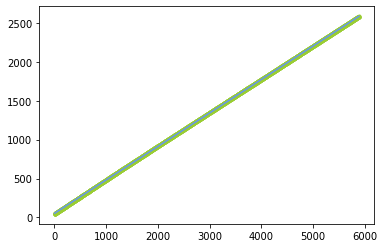

In [151]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

days_len=len(days)

line_X = np.array(
    list(
        zip(
            np.linspace(min(days), max(days), days_len), 
            np.ones(days_len)
        )
    )
)

line_y_ransac = ransac.predict(line_X)

X_inlier=X[inlier_mask][:,0]
y_inlier=y[inlier_mask]
plt.scatter(
    X_inlier, y_inlier, 
    color="yellowgreen", marker=".", label="Inliers"
)

# 
X_outlier=X[outlier_mask][:,0]
y_outlier=y[outlier_mask]
plt.scatter(
    X_outlier, y_outlier, 
    color="gold", marker=".", label="Outliers"
)

# 
line_X=line_X[:, 0]
plt.plot(
    line_X,
    line_y_ransac,
    color="cornflowerblue",
    label="RANSAC regressor",
)

plt.show()


In [154]:
num_comics/max(days)

0.43839103869653767